In [1]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [12]:
def generate_data(foldername):
    allfiles = [f"{foldername}/{f}" for f in listdir(foldername) if isfile(join(foldername, f))]
    num_cores = len(allfiles)
    print(allfiles)
    all_data = {}
    #get number of files in folder
    for i in range(1, num_cores+1): #range(numberoffiles)
        filename = f"{foldername}/out_{i}.csv"
        #print(filename)
        assert filename in allfiles
        results = pd.read_csv(filename, sep=';')
        for i, row in results.iterrows():
            #print(row)
            desc = row['Descriptor']
            mode = row['Mode']
            if desc in all_data:
                if mode in all_data[desc]:
                    all_data[desc][mode] += [row['Mean']]
                else:
                    all_data[desc].update({mode: [row['Mean']]})
            else:
                all_data[desc] = {mode: [row['Mean']]}

    return all_data

In [ ]:
all_data = generate_data('results/activation')
all_data

['gcc_results/quicksort/out_18.csv', 'gcc_results/quicksort/out_28.csv', 'gcc_results/quicksort/out_23.csv', 'gcc_results/quicksort/out_11.csv', 'gcc_results/quicksort/out_16.csv', 'gcc_results/quicksort/out_22.csv', 'gcc_results/quicksort/out_26.csv', 'gcc_results/quicksort/out_7.csv', 'gcc_results/quicksort/out_19.csv', 'gcc_results/quicksort/out_25.csv', 'gcc_results/quicksort/out_20.csv', 'gcc_results/quicksort/out_9.csv', 'gcc_results/quicksort/out_13.csv', 'gcc_results/quicksort/out_6.csv', 'gcc_results/quicksort/out_21.csv', 'gcc_results/quicksort/out_3.csv', 'gcc_results/quicksort/out_8.csv', 'gcc_results/quicksort/out_5.csv', 'gcc_results/quicksort/out_17.csv', 'gcc_results/quicksort/out_14.csv', 'gcc_results/quicksort/out_10.csv', 'gcc_results/quicksort/out_15.csv', 'gcc_results/quicksort/out_1.csv', 'gcc_results/quicksort/out_27.csv', 'gcc_results/quicksort/out_4.csv', 'gcc_results/quicksort/out_24.csv', 'gcc_results/quicksort/out_2.csv', 'gcc_results/quicksort/out_12.csv']


<Figure size 432x288 with 0 Axes>

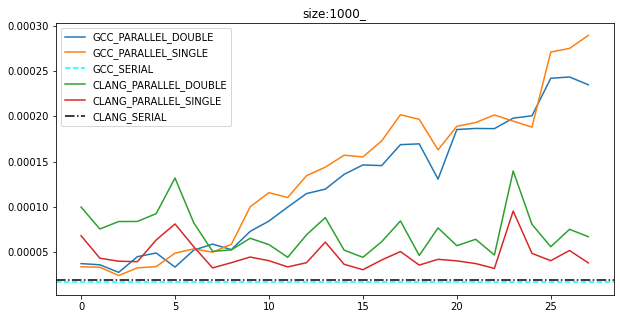

<Figure size 432x288 with 0 Axes>

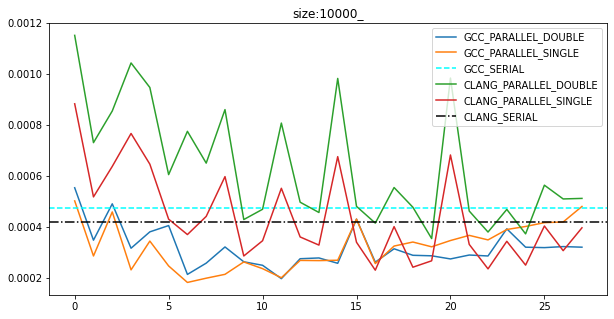

<Figure size 432x288 with 0 Axes>

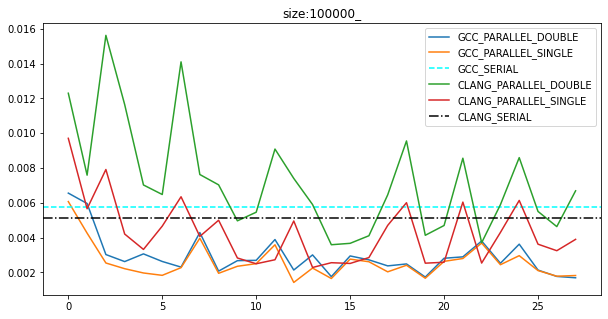

<Figure size 432x288 with 0 Axes>

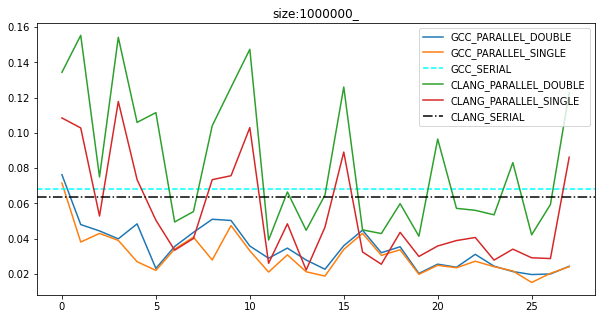

<Figure size 432x288 with 0 Axes>

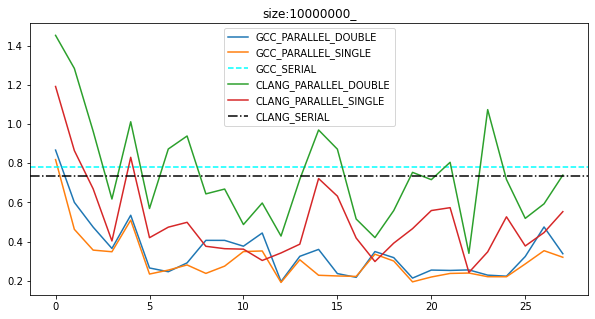

In [21]:

benchmarks = ['quicksort']#[conv matmul]
for bench in benchmarks:
    gcc_data = generate_data(f"gcc_results/{bench}")# pass folder name
    clang_data = generate_data(f"clang_results/{bench}")# pass folder name
    descriptors = list(gcc_data.keys())
    for desc in descriptors:
        assert desc in clang_data
        #print(all_data.keys())
        #print(all_data['size:1000000_static_size:1000_'])
        serial_gcc = gcc_data[desc].pop('SERIAL', None)

        serial_clang = clang_data[desc].pop('SERIAL', None)
        #print(all_data[desc])
        gcc_results = pd.DataFrame(data=gcc_data[desc])
        gcc_results = gcc_results.add_prefix('GCC_')
        clang_results = pd.DataFrame(data=clang_data[desc])
        clang_results = clang_results.add_prefix('CLANG_')
        plt.figure()
        p = gcc_results.plot(title=desc, figsize=(10,5))
        plt.axhline(y=serial_gcc, color='cyan', linestyle='dashed', label='GCC_SERIAL')
        clang_results.plot(ax=p)
        #print(serial)
        plt.axhline(y=serial_clang, color='black', linestyle='dashdot', label='CLANG_SERIAL')
        plt.legend()
        